In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
import pandas as pd
import pickle

rows = []

with open('Plot_comparsions_similarityv2.pkl', 'rb') as f:
    results_significance = pickle.load(f)
    
    # Iterate through the dictionary to extract the data
    for task, activities in results_significance.items():
        for activity, features in activities.items():
            for featureset, values in features.items():
                row = {
                    'dataset': task,
                    'activity': activity,
                    'featureset': featureset,
                    't-statistic': values['t-statistic'],
                    'p-value': values['p-value']
                }
                rows.append(row)

# Convert the list of rows to a dataframe
df = pd.DataFrame(rows)

df.to_csv("Plot_comparsions_similarityv2.csv", index=False)
df


,dataset,activity,featureset,t-statistic,p-value
0,toxcast,TOX21_PPARg_BLA_antagonist_viability,structural,5.872439,7.101519e-08
1,toxcast,TOX21_PPARg_BLA_antagonist_viability,image,-68.266570,2.606392e-79
2,toxcast,BSK_3C_MIG_down,structural,3.799322,2.700360e-04
3,toxcast,BSK_3C_MIG_down,image,-0.212707,8.320591e-01
4,toxcast,TOX21_VDR_BLA_Antagonist_ch1,structural,8.825927,7.926101e-14
...,...,...,...,...,...
739,HIV,HIV_active,image,-11.190045,6.818930e-17
740,DILIst,DILIst Classification,structural,-9.335458,5.416178e-20
741,DILIst,DILIst Classification,image,-4.142561,3.698629e-05
742,clintox,CT_TOX,structural,6.665032,3.448456e-10


<Figure size 2400x1800 with 0 Axes>

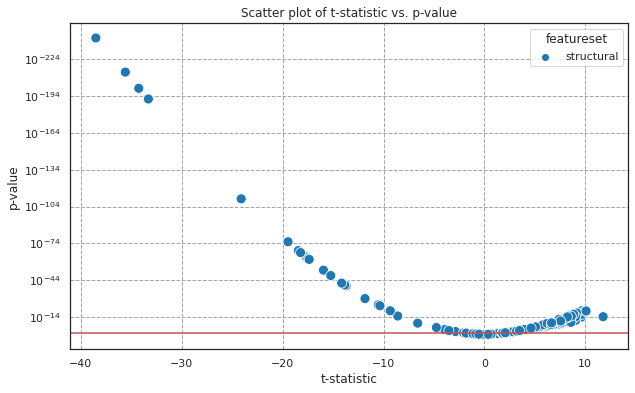

<Figure size 2400x1800 with 0 Axes>

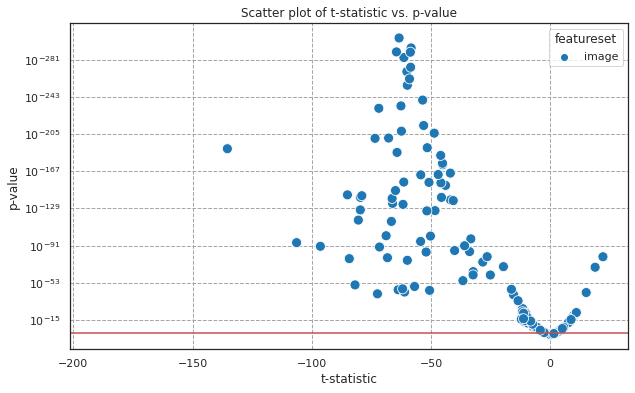

In [4]:
## Plotting
colors = {'structural': 'blue', 'image': 'green'}

for features in ['structural', 'image']:
    
    plt.figure(figsize=(8, 6), dpi=300) 
    sns.set(style="white")  # Set the style
    
    subset = df[df['featureset'] == features]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=subset, x='t-statistic', y='p-value', hue='featureset', palette='tab10', style='featureset', s=100)
    plt.yscale('log')
    plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
    plt.title('Scatter plot of t-statistic vs. p-value')
    plt.grid(True, which="both", ls="--", c='0.65')
    
    plt.axhline(y=0.05, color='r', linestyle='-')
    #plt.legend()
    plt.savefig(f'{features}_pvalue_tstatistic_comparison.png', bbox_inches='tight')
    plt.show()
           